In [3]:
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.font_manager import FontProperties
myfont =FontProperties(fname=r'C:\Windows\Fonts\kaiu.ttf',size=14) #中文 設定 FONT 連到 WINDOWS 字體 
sns.set(font=myfont.get_name())

In [4]:
df = pd.read_csv('imputeData2017.csv' , encoding = "big5") # 原始資料
df_nonull = df.dropna() #清除 NA
x = df_nonull.drop(['PM2.5','Daye','Time'], axis=1)
y = df_nonull['PM2.5']
df.head(3)
#讀資料

,Daye,Time,Air Pressure,Air Temperature,Relative Humidity,Wind Speed,Precipitation,PM2.5
0,2017/1/1,1,970.3,15.6,94.0,0.3,0.0,54.0
1,2017/1/1,2,970.0,15.2,94.0,0.0,0.0,54.0
2,2017/1/1,3,969.8,14.7,98.0,0.0,0.0,45.0


In [5]:
df.info() ##看資料

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 8 columns):
Daye                 8760 non-null object
Time                 8760 non-null int64
Air Pressure         8760 non-null float64
Air Temperature      8760 non-null float64
Relative Humidity    8760 non-null float64
Wind Speed           8760 non-null float64
Precipitation        8760 non-null float64
PM2.5                8760 non-null float64
dtypes: float64(6), int64(1), object(1)
memory usage: 547.6+ KB


In [6]:
df.describe() # 看資料

,Time,Air Pressure,Air Temperature,Relative Humidity,Wind Speed,Precipitation,PM2.5
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,12.500000,962.873502,22.525309,83.057954,0.890812,0.320988,24.625568
std,6.922582,4.397354,4.956583,16.285166,0.795717,2.220969,14.448751
min,1.000000,940.400000,9.100000,24.000000,0.000000,0.000000,2.000000
25%,6.750000,960.100000,19.100000,70.000000,0.400000,0.000000,14.000000
50%,12.500000,962.700000,22.900000,89.000000,0.600000,0.000000,22.000000
75%,18.250000,965.700000,25.800000,98.000000,1.200000,0.000000,33.000000
max,24.000000,977.300000,36.200000,99.000000,5.700000,68.500000,127.000000


In [7]:
df.isnull() #遺漏直

,Daye,Time,Air Pressure,Air Temperature,Relative Humidity,Wind Speed,Precipitation,PM2.5
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
8755,False,False,False,False,False,False,False,False
8756,False,False,False,False,False,False,False,False
8757,False,False,False,False,False,False,False,False
8758,False,False,False,False,False,False,False,False


Text(0.5, 115.20937499999997, '特徵')

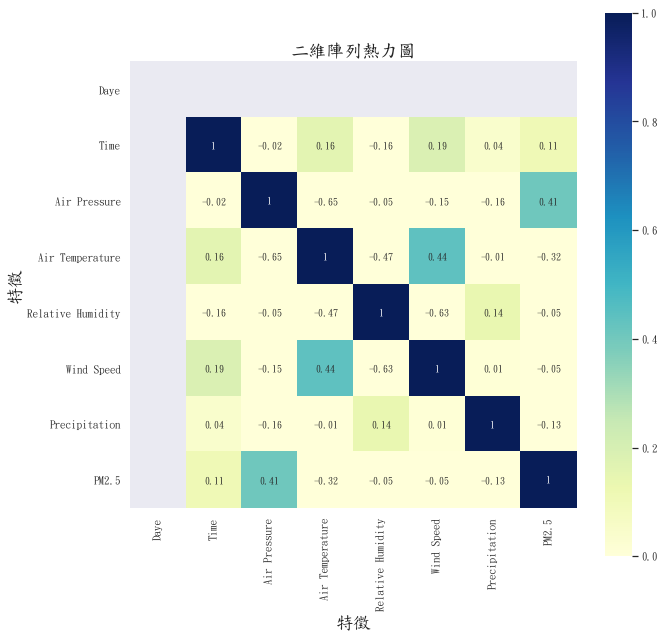

In [8]:
#相關係數矩陣
a = df.corr()
fig, ax = plt.subplots(figsize = (10,10))
#二維的陣列的熱力圖，橫軸和數軸的ticklabels要加上去的話，既可以通過將array轉換成有column
#和index的DataFrame直接繪圖生成，也可以後續再加上去。後面加上去的話，更靈活，包括可設定labels大小方向等。
sns.heatmap(pd.DataFrame(np.round(a,2), columns =df.columns, index = df.columns), 
                annot=True, vmax=1,vmin = 0, xticklabels= True, yticklabels= True, square=True, cmap="YlGnBu")
#sns.heatmap(np.round(a,2), annot=True, vmax=1,vmin = 0, xticklabels= True, yticklabels= True, 
#            square=True, cmap="YlGnBu")
ax.set_title('二維陣列熱力圖', fontsize = 18)
ax.set_ylabel('特徵', fontsize = 18)
ax.set_xlabel('特徵', fontsize = 18) #橫變成y軸，跟矩陣原始的佈局情況是一樣的

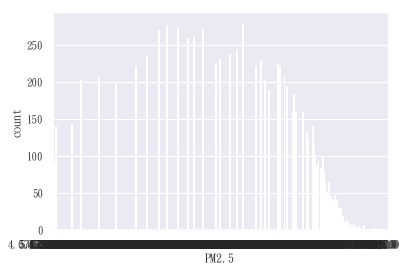

In [9]:
sns.countplot(y) #y 的分布

In [10]:
from sklearn.model_selection import train_test_split ##隨機切資料
X_train, X_test, y_train, y_test = train_test_split(
x, y , test_size=0.2, random_state=0)
y_trainn = np.array(y_train)

In [11]:
#正規化
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
sc.fit(x)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [12]:
import warnings

warnings.filterwarnings('ignore')

In [ ]:
%%time
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import sys
import math
from multiprocessing import cpu_count
import threading
from queue import Queue

cpu_count = cpu_count()



DNA_SIZE = 2          # DNA length      DNA 長度 維度
DNA_MAX  = 50       # DNA 編碼
POP_SIZE = cpu_count  * 20        # population size 人口長度    * 2  要是 cpu_count的倍數
CROSS_RATE = 1         # crossover probability 
MUTATION_RATE = 0.2    # mutation probability 
max_iter =  100        #迭帶次數  
MFE = POP_SIZE * 2  * max_iter              #計算fintneess 次數
MFE_COUNT = 0
X_BOUND = [0, DNA_MAX]         # x upper and lower bounds 上下限
MFE_COUNT = 0
tempF = 1000000 #紀錄有沒有進不
finess = np.zeros( (POP_SIZE * 2, 1) )
pop = np.random.uniform(X_BOUND[0],DNA_MAX , size=(POP_SIZE, DNA_SIZE))   # initialize the pop DNA
fitness = []
clf = RandomForestRegressor(max_depth= 2, random_state=0,             n_estimators=10)



def threadF(pop,cpu_count):
    splitpop =  np.array_split(pop, cpu_count, axis=0)
    threads = []
    q = Queue()   # 宣告 Queue 物件
    for i in range(cpu_count):
        t = threading.Thread(target=getFintness, args=(splitpop[i],q,i)) # 將 data 與 queue 傳入 thread 裡面
        t.start()
        threads.append(t)

    for thread in threads:
        thread.join() # 每個 thread 都要做 join
    results = [] # 用來接收與顯示結果的 array

    for _ in range(cpu_count):
        results.append(q.get()) # 取出 queue 裡面的資料
    results = np.array(results)
    results = results[results[:,2].argsort()]
    minnumber ,min_index  =  int(results[0,0]) , int(results[0, 1])
    minspop = splitpop[ minnumber  ] 
    minspop = minspop [min_index , :]
    minscore = results[0,2]
    temp = [minscore,  minspop]
    return temp

def F(x):
    #LSVR 
    clf =  RandomForestRegressor(max_depth= int(x[0]) + 1, random_state=0,   n_estimators=int(x[1]) + 10)
    clf.fit(X_train_std,y_train)
    pred = clf.predict(X_train_std)
       
    #RMSE 
    n = X_train.shape[0] 
    rmse = 0.0
    for i in range(n):
        rmse += (pred[i] - y_trainn[i]) ** 2
    rmse = (rmse/n) ** 0.5
    return rmse
                                
                                
def getFintness(pop,q,number):
        min1 = sys.maxsize
        count = 0 
        min_index = 0
        for i in pop:  
            i_finess = F(i)
            if( i_finess < min1):
                min1 = i_finess
                min_index = count
                count = count + 1   
        result = [number ,min_index , min1 ]
        q.put( result)

def selectF(pop):
    splitpop =  np.array_split(pop, cpu_count, axis=0)
    
    threads = []
    q = Queue()   # 宣告 Queue 物件
    for i in range(cpu_count):
        t = threading.Thread(target=returnF, args=(splitpop[i],q,i)) # 將 data 與 queue 傳入 thread 裡面
        t.start()
        threads.append(t)

    for thread in threads:
        thread.join() # 每個 thread 都要做 join
    results = [] # 用來接收與顯示結果的 array
    for _ in range(cpu_count):
        results.append(q.get()) # 取出 queue 裡面的資料
    results = np.array(results)
    results = results[results[:,0].argsort()]    
    results = results[:,1:]
    a = len(results)
    b = len(results[0])
    results = results.reshape(a * b , 1)

    return results

def returnF(pop,q,x):
    lenth = len(pop)
    temp = [0] * (lenth + 1)
    temp[0] = x  
    index = 1
    for i in pop :
        i_finess = F(i)
        global MFE_COUNT
        MFE_COUNT = MFE_COUNT + 1
        temp[index] = i_finess
        index = index + 1
    q.put(temp)
        
def select(pop, new):   
    pop = np.row_stack((pop,new))
    finess = selectF(pop)
    pop = np.c_[pop,finess]
    pop = pop[np.lexsort(pop.T)]
    pop_row = pop.shape[0]
    pop_col = pop.shape[1]
    pop =  np.delete(pop, [pop_col - 1], axis=1)
    #pop = pop[pop_row - 1 - POP_SIZE :pop_row - 1, :] # 找最大 排序200 個 由小排到大
    pop = pop[:POP_SIZE,:]
    return pop   
def crossover(pop,copy):
    temp =[0] * DNA_SIZE
    for i in range (DNA_SIZE):
        if np.random.rand() < CROSS_RATE:
            r = np.random.rand() 
            i_ = 1 - r 
            x =  np.random.randint(POP_SIZE)
            
            temp[i] = r * pop[i] + i_ * copy[x,i]
    return temp
        
def mutate(child):
    for i in range (DNA_SIZE ):     
        if np.random.rand() < MUTATION_RATE:
            a = np.random.uniform(X_BOUND[0] ,DNA_MAX)
            child[i] = a
    return child

                

temp = np.random.uniform(DNA_MAX, size=(POP_SIZE, DNA_SIZE))
result1 = []
while( MFE_COUNT < MFE):   
    pop = select(pop, temp )
    temp = np.zeros( (1 , DNA_SIZE) )
    new  = pop.copy()
    for parent in pop:
        child = crossover(parent, new)
        child = mutate(child)
        temp = np.row_stack((temp,child))
        
    temp = np.delete(temp, [0], axis=0)
    threadF(pop,cpu_count)
    minnumber = threadF(pop,cpu_count)
    
    print(MFE_COUNT /(POP_SIZE * 2),"最好的基因",minnumber[0])
    print(MFE_COUNT /(POP_SIZE * 2),"最好的分數",minnumber[1])
    
    result1.append(minnumber[1])
    

    
print("最好的基因",minnumber[0])
print("最好的分數",minnumber[1])



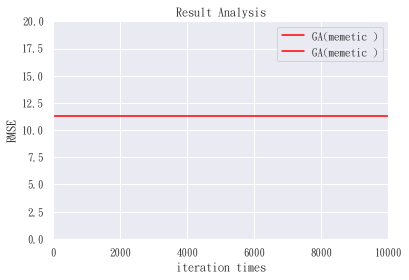

In [14]:
# -*- coding: UTF-8 -*-
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

#这里导入你自己的数据
#......
#......
#x_axix，train_pn_dis这些都是长度相同的list()
a = np.linspace(0,MFE,len(result1) )
y = np.linspace(300000,0 ,5)
#开始画图
#sub_axix = filter(y, a)
plt.xlim(0,10000)
plt.ylim(0, 20)
plt.title('Result Analysis')
#plt.plot(a, result, color='green', label='GA')
plt.plot(a, result1, color='red', label='GA(memetic )')
#plt.plot(a, result2,  color='skyblue', label='GA(mutation )')
# plt.plot(x_axix, thresholds, color='blue', label='threshold')
plt.legend() # 显示图例

plt.xlabel('iteration times')
plt.ylabel('RMSE')
plt.savefig("meta.png")
plt.show()
#python 一个折线图绘制多个曲线

In [15]:
target = y_trainn
clf = LinearSVR(tol=1e-5, C=11.3287209  , epsilon=11.57086139)
clf.fit(X_train_std,y_train)

ypred = clf.predict(X_train_std)
prediction = ypred

mape = 0.0
for i in range(len(target)):
    mape += abs( prediction [i] -  target[i]  ) / target[i]
mape = mape / len(target) * 100
print("MAPE = ", mape )

error = []
for i in range(len(target)):
    error.append(target[i] - prediction[i])

squaredError = []
absError = []
for val in error:
    squaredError.append(val * val)#target-prediction之差平方 
    absError.append(abs(val))#误差绝对值

print("MSE = ", sum(squaredError) / len(squaredError))#均方误差MSE
 
from math import sqrt
print("RMSE = ", sqrt(sum(squaredError) / len(squaredError)))#均方根误差RMSE
print("MAE = ", sum(absError) / len(absError))#平均绝对误差MAE

targetDeviation = []
targetMean = sum(target) / len(target)#target平均值
for val in target:
    targetDeviation.append((val - targetMean) * (val - targetMean))
print("Actural Variance = ", sum(targetDeviation) / len(targetDeviation))#實際值方差

print("Actural Standard Deviation = ", sqrt(sum(targetDeviation) / len(targetDeviation)))#實際值方差标准差

MAPE =  65.862842862349
MSE =  169.24525671402301
RMSE =  13.009429530691307
MAE =  9.879873367466372
Actural Variance =  206.85004050896111
Actural Standard Deviation =  14.382282173179648


# TEST

In [16]:
##TEST
clf = LinearSVR(tol=1e-5, C=11.3287209  , epsilon=11.57086139)
clf.fit(X_train_std,y_train)
pred = clf.predict(X_test_std)
n = X_test_std.shape[0] 

y_testt = np.array(y_test)

rmse = 0.0
for i in range(n):
    rmse += (pred[i] - y_testt[i]) ** 2
rmse = (rmse/n) ** 0.5
print("RMSE" , rmse)

RMSE 13.153804433886679


In [17]:
target = y_testt

prediction = pred

mape = 0.0
for i in range(len(target)):
    mape += abs( prediction [i] -  target[i]  ) / target[i]
mape = mape / len(target) * 100
print("MAPE = ", mape )

error = []
for i in range(len(target)):
    error.append(target[i] - prediction[i])

squaredError = []
absError = []
for val in error:
    squaredError.append(val * val)#target-prediction之差平方 
    absError.append(abs(val))#误差绝对值

print("MSE = ", sum(squaredError) / len(squaredError))#均方误差MSE
 
from math import sqrt
print("RMSE = ", sqrt(sum(squaredError) / len(squaredError)))#均方根误差RMSE
print("MAE = ", sum(absError) / len(absError))#平均绝对误差MAE

targetDeviation = []
targetMean = sum(target) / len(target)#target平均值
for val in target:
    targetDeviation.append((val - targetMean) * (val - targetMean))
print("Actural Variance = ", sum(targetDeviation) / len(targetDeviation))#實際值方差

print("Actural Standard Deviation = ", sqrt(sum(targetDeviation) / len(targetDeviation)))#實際值方差标准差

MAPE =  70.21717115618053
MSE =  173.02257108493686
RMSE =  13.153804433886679
MAE =  9.855899881056265
Actural Variance =  216.16102024581895
Actural Standard Deviation =  14.702415456169742
